In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
seg = pd.read_csv('/Users/blackrose/Downloads/segmentation data.csv')
seg


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


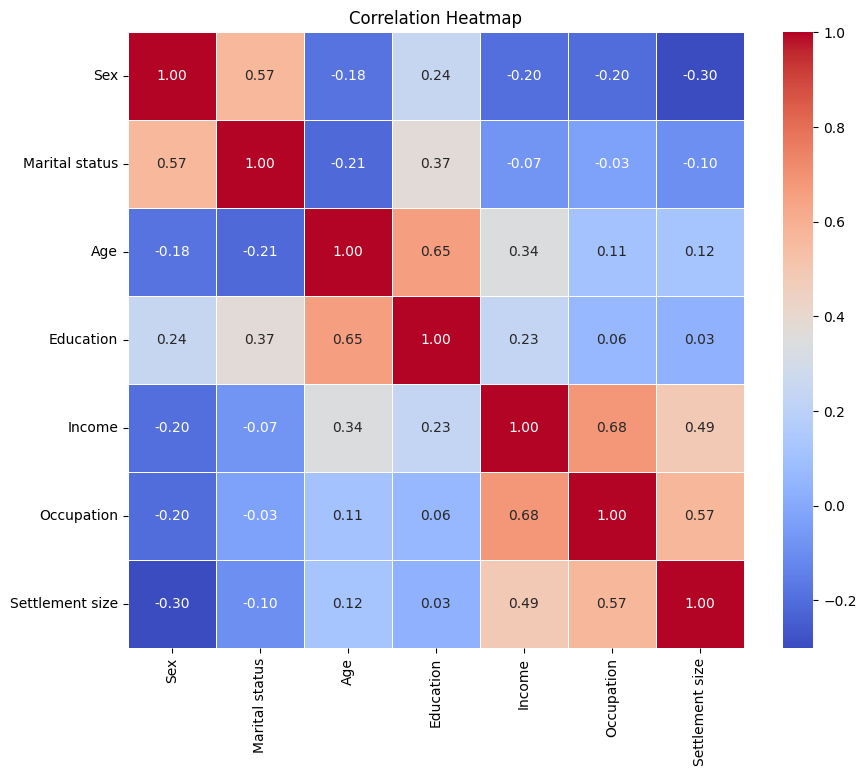

In [31]:
df_numeric = seg.drop(columns=['ID'])

# สร้าง correlation matrix
corr_matrix = df_numeric.corr()

# วาด heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
from sklearn.decomposition import PCA


In [ ]:
# pca = PCA(n_components=X.shape[1])
pca = PCA(n_components=2)

X_pca=pca.fit_transform(seg)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}')
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=3) = [1.45231320e+09 3.02826749e+05 1.21517661e+02]
explained_variance_ratio (n_components=3) = [9.99791446e-01 2.08469903e-04 8.36543505e-08]
sum explained_variance_ratio = 0.9999999990868736


In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'The elbow method showing the optimal k')

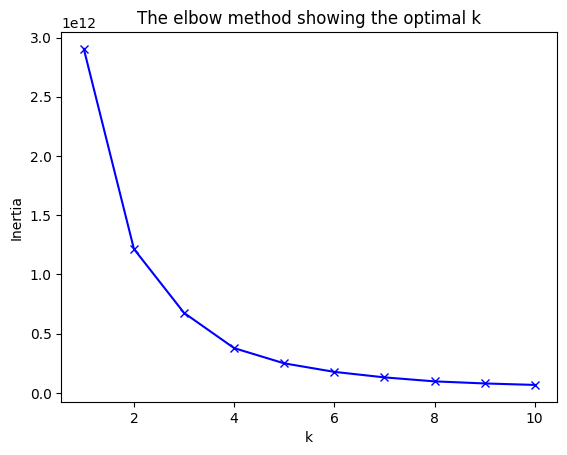

In [22]:
k = 10
inertias = []
for k in range(1,k+1):
    kmm = KMeans(n_clusters=k, random_state=15)
    kmm.fit(X_pca)
    inertias.append(kmm.inertia_)


plt.figure()
plt.plot(range(1, k+1), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The elbow method showing the optimal k')

In [25]:
from sklearn.metrics import silhouette_score

# compare between 2 can 3
kmeans_model = KMeans(n_clusters=4, random_state=15)
kmeans_model.fit(X_pca)
cluster_labels = kmeans_model.predict(X_pca)

print(f"Kmean Silhouette Scores: {silhouette_score(X_pca, cluster_labels)}")

Kmean Silhouette Scores: 0.5405054577886665


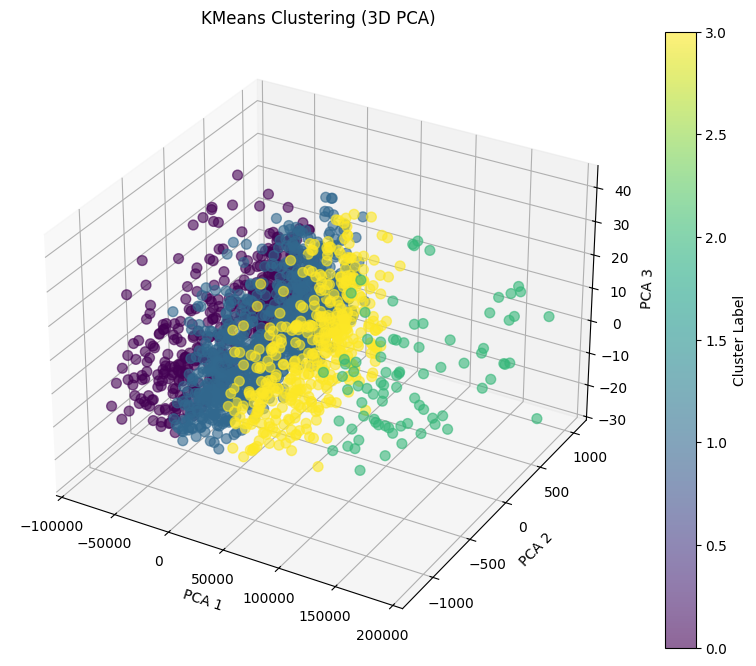

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# สมมติว่า X_pca มี 3 คอลัมน์ (3 principal components)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# วาด scatter plot โดยใช้ 3D
scatter = ax.scatter(
    X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],  # 3D coordinates
    c=cluster_labels,                      # สีตามคลัสเตอร์
    cmap='viridis',                        # colormap
    s=50,                                  # ขนาดจุด
    alpha=0.6
)

# เพิ่มชื่อแกน
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('KMeans Clustering (3D PCA)')

# แสดงผล
plt.colorbar(scatter, label='Cluster Label')
plt.show()


/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_66030/4271672956.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


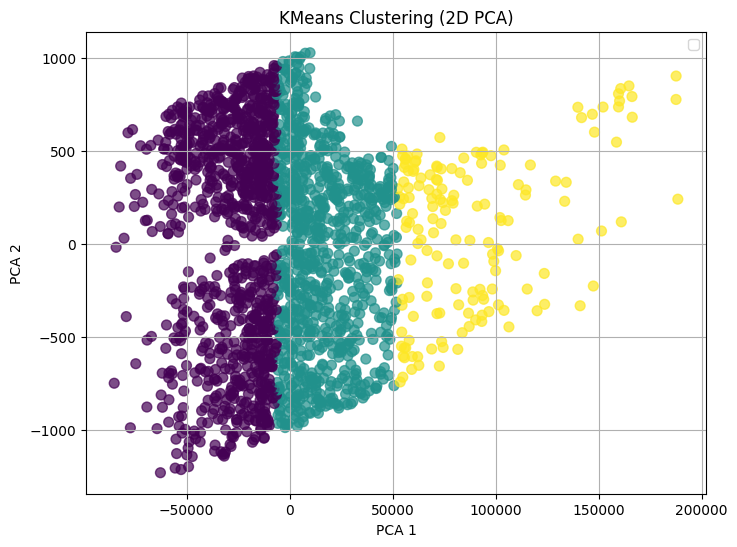

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# KMeans clustering (สมมุติว่า X_pca มี 2 columns)
kmeans_model = KMeans(n_clusters=3, random_state=15)
kmeans_model.fit(X_pca)
cluster_labels = kmeans_model.predict(X_pca)

# วาดกราฟ 2D
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=cluster_labels,
    cmap='viridis',
    s=50,
    alpha=0.7
)


# ตั้งชื่อแกน
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans Clustering (2D PCA)')
plt.legend()
plt.grid(True)
plt.show()
